Note <br> I did this Assignment in Google colab, and dowloaded as ipynb and submitting to @appliedaicourse..

# Deep Learning Assignment using MNIST Data set.. 
### To implement BN,Dropout,ReLu in 3 Different Architectures using Keras

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

C:\Users\PRUTHVI\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 13s 1us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of testing examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of testing examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of testing examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of testing examples : 10000 and each image is of shape (784)


In [6]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [7]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [8]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [9]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:

from keras.models import Sequential 
from keras.layers import Dense, Activation 
# there are many activation functions ar available ex: tanh, relu, softmax

In [14]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [15]:
# start building a model
model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))


In [16]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 91us/step - loss: 1.2724 - acc: 0.7014 - val_loss: 0.8047 - val_acc: 0.8336
Epoch 2/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.7116 - acc: 0.8412 - val_loss: 0.6033 - val_acc: 0.8650
Epoch 3/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.5841 - acc: 0.8603 - val_loss: 0.5226 - val_acc: 0.8769
Epoch 4/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.5229 - acc: 0.8691 - val_loss: 0.4775 - val_acc: 0.8831
Epoch 5/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.4856 - acc: 0.8753 - val_loss: 0.4483 - val_acc: 0.8879
Epoch 6/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.4600 - acc: 0.8800 - val_loss: 0.4273 - val_acc: 0.8906
Epoch 7/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.4410 - acc: 0.8836 - val_loss: 0.4109 - val_acc

Test accuracy: 0.9099


<IPython.core.display.Javascript object>


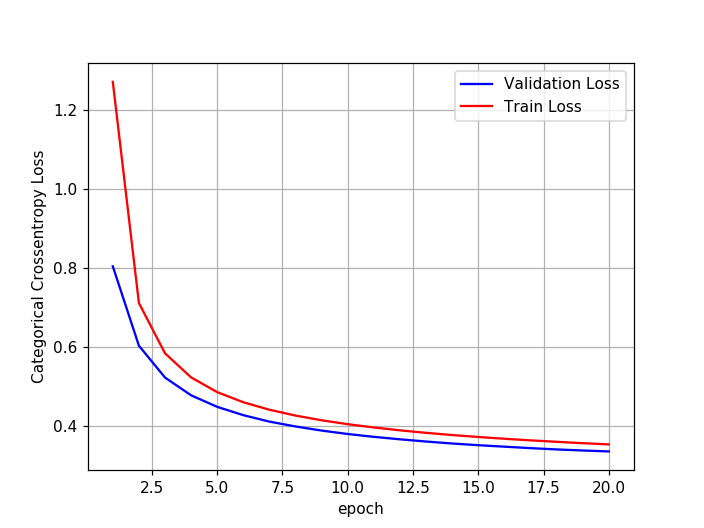

In [17]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
#accuracy : Test accuracy
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Architecture 1 , BatchNormalization(784-512-128-10)+Adam

In [18]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [19]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 270us/step - loss: 0.3005 - acc: 0.9109 - val_loss: 0.2141 - val_acc: 0.9365
Epoch 2/20
60000/60000 [==============================] - 15s 249us/step - loss: 0.1760 - acc: 0.9493 - val_loss: 0.1860 - val_acc: 0.9456
Epoch 3/20
60000/60000 [==============================] - 17s 279us/step - loss: 0.1386 - acc: 0.9588 - val_loss: 0.1488 - val_acc: 0.9558
Epoch 4/20
60000/60000 [==============================] - 19s 315us/step - loss: 0.1135 - acc: 0.9658 - val_loss: 0.1313 - val_acc: 0.9619
Epoch 5/20
60000/60000 [==============================] - 21s 343us/step - loss: 0.0949 - acc: 0.9710 - val_loss: 0.1186 - val_acc: 0.9643
Epoch 6/20
60000/60000 [==============================] - 23s 375us/step - loss: 0.0800 - acc: 0.9752 - val_loss: 0.1087 - val_acc: 0.9667
Epoch 7/20
60000/60000 [==============================] - 24s 398us/step - loss: 0.0672 - acc: 0.9796 - val_loss: 0.

Test accuracy: 0.9744


<IPython.core.display.Javascript object>


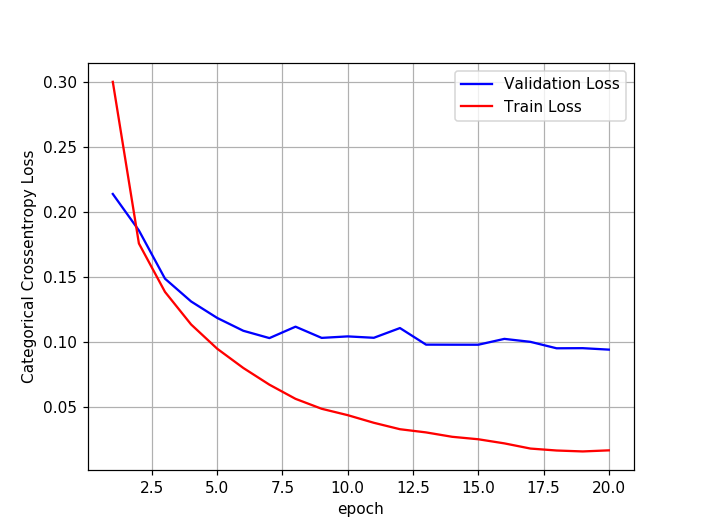

In [20]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
#accuracy : Test accuracy
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Architecture 2 , BN(784-512-128-130-10)+adam

In [21]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(130, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dense_8 (Dense)              (None, 130)               16770     
_________________________________________________________________
batch_normalization_5 (Batch (None, 130)               520       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1310      
Total para

In [22]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 319us/step - loss: 0.3472 - acc: 0.8960 - val_loss: 0.2473 - val_acc: 0.9249
Epoch 2/20
60000/60000 [==============================] - 18s 292us/step - loss: 0.2034 - acc: 0.9388 - val_loss: 0.2046 - val_acc: 0.9398
Epoch 3/20
60000/60000 [==============================] - 20s 337us/step - loss: 0.1624 - acc: 0.9508 - val_loss: 0.1716 - val_acc: 0.9490
Epoch 4/20
60000/60000 [==============================] - 23s 383us/step - loss: 0.1367 - acc: 0.9578 - val_loss: 0.1577 - val_acc: 0.9534
Epoch 5/20
60000/60000 [==============================] - 25s 413us/step - loss: 0.1174 - acc: 0.9643 - val_loss: 0.1475 - val_acc: 0.9551
Epoch 6/20
60000/60000 [==============================] - 28s 460us/step - loss: 0.1067 - acc: 0.9667 - val_loss: 0.1312 - val_acc: 0.9582loss:
Epoch 7/20
60000/60000 [==============================] - 31s 510us/step - loss: 0.0924 - acc: 0.9710 - val_los

Test accuracy: 0.9721


<IPython.core.display.Javascript object>


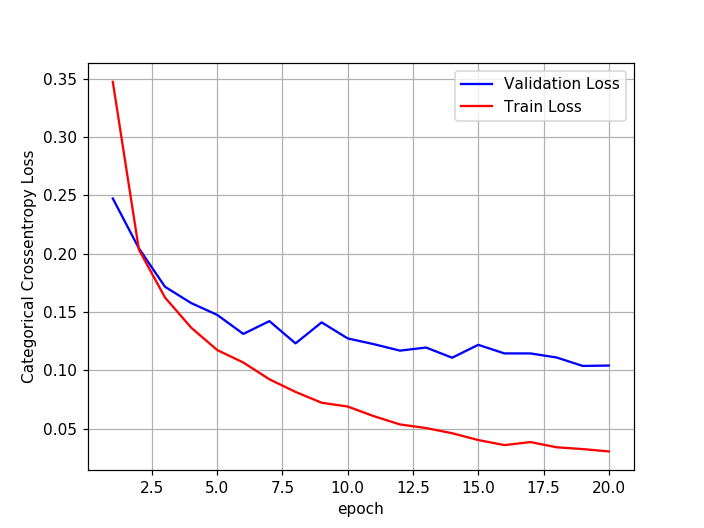

In [23]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
#accuracy : Test accuracy
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Architecture 3 ,  BN(784-512-128-130-140-111-10)+Adam

In [24]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(130, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(140, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(111, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
dense_12 (Dense)             (None, 130)               16770     
_________________________________________________________________
batch_normalization_8 (Batch (None, 130)               520       
_________________________________________________________________
dense_13 (Dense)             (None, 140)               18340     
__________

In [25]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 39s 657us/step - loss: 0.5620 - acc: 0.8241 - val_loss: 0.3428 - val_acc: 0.8934
Epoch 2/20
60000/60000 [==============================] - 35s 581us/step - loss: 0.3074 - acc: 0.9072 - val_loss: 0.2810 - val_acc: 0.9192
Epoch 3/20
60000/60000 [==============================] - 35s 586us/step - loss: 0.2413 - acc: 0.9274 - val_loss: 0.2377 - val_acc: 0.9276
Epoch 4/20
60000/60000 [==============================] - 35s 582us/step - loss: 0.2103 - acc: 0.9372 - val_loss: 0.2122 - val_acc: 0.9373
Epoch 5/20
60000/60000 [==============================] - 34s 562us/step - loss: 0.1857 - acc: 0.9440 - val_loss: 0.1960 - val_acc: 0.9412
Epoch 6/20
60000/60000 [==============================] - 35s 579us/step - loss: 0.1665 - acc: 0.9497 - val_loss: 0.1795 - val_acc: 0.9471
Epoch 7/20
60000/60000 [==============================] - 34s 573us/step - loss: 0.1517 - acc: 0.9541 - val_loss: 0.

Test accuracy: 0.9652


<IPython.core.display.Javascript object>


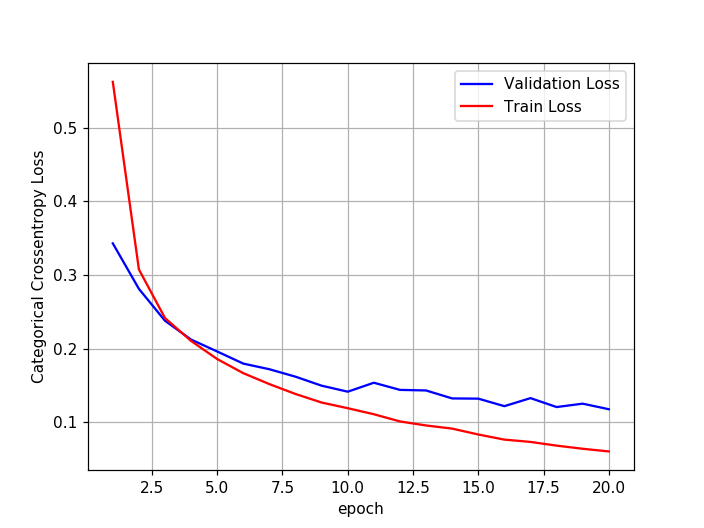

In [26]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
#accuracy : Test accuracy
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Architecture 1 on Relu (MLP + ReLu + Adam)

In [27]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 26s 429us/step - loss: 0.2317 - acc: 0.9315 - val_loss: 0.1147 - val_acc: 0.9643
Epoch 2/20
60000/60000 [==============================] - 25s 408us/step - loss: 0.0845 - acc: 0.9750 - val_loss: 0.0864 - val_acc: 0.9740
Epoch 3/20
60000/60000 [==============================] - 25s 411us

Test accuracy: 0.9798


<IPython.core.display.Javascript object>


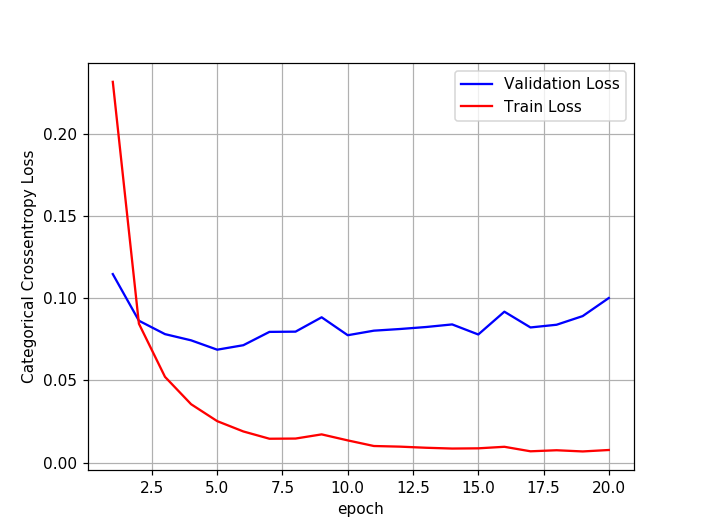

In [28]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
#print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Architecture 2 , (MLP + ReLU() + Adam)

In [29]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(130, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_20 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_21 (Dense)             (None, 130)               16770     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1310      
Total params: 485,664
Trainable params: 485,664
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 27s 456us/step - loss: 0.2350 - acc: 0.9293 - val_loss: 0.1369 - val_acc: 0.9560
Epoch 2/20
60000/60000 [==============================] - 25s 409us/step -

Test accuracy: 0.9825


<IPython.core.display.Javascript object>


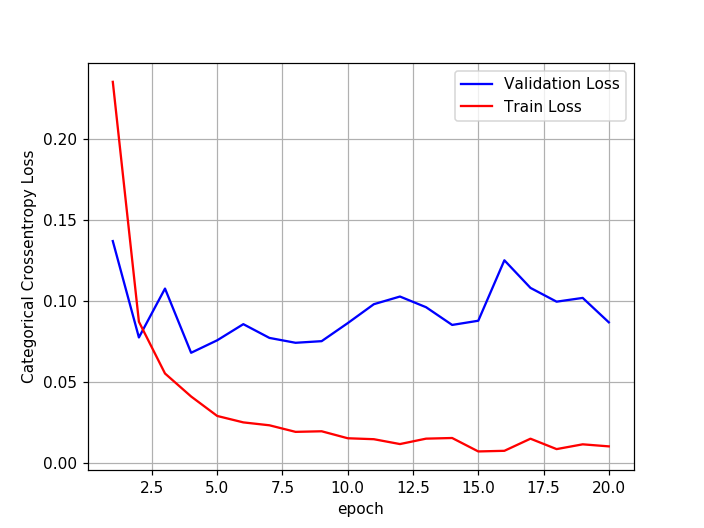

In [30]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
#print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Architecture 3 (MLP + ReLu() + Adam)

In [31]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(130, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(140, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(111, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_24 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_25 (Dense)             (None, 130)               16770     
_________________________________________________________________
dense_26 (Dense)             (None, 140)               18340     
_________________________________________________________________
dense_27 (Dense)             (None, 111)               15651     
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1120      
Total params: 519,465
Trainable params: 519,465
Non-trainable params: 0
_________________________________________________________________
None

Test accuracy: 0.9806


<IPython.core.display.Javascript object>


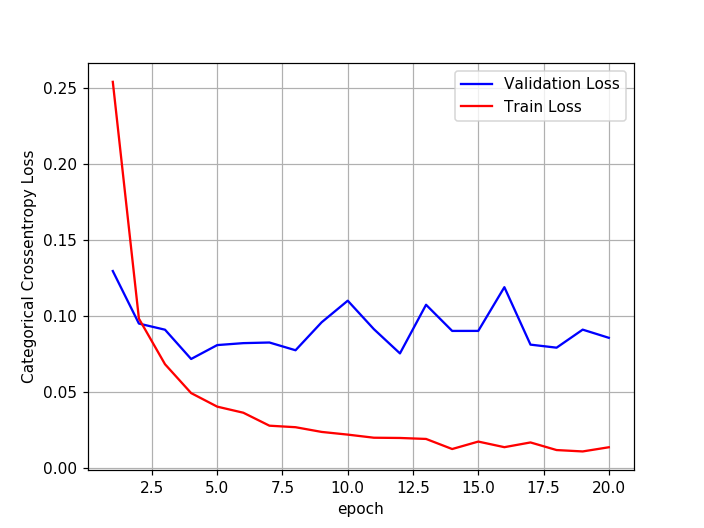

In [32]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
#print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Architecture 1 using Drop out (MLP + Dropout() + Adam)

In [33]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                1290      
Total para

In [34]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 37s 619us/step - loss: 0.6779 - acc: 0.7921 - val_loss: 0.2872 - val_acc: 0.9151
Epoch 2/20
60000/60000 [==============================] - 32s 541us/step - loss: 0.4303 - acc: 0.8688 - val_loss: 0.2497 - val_acc: 0.9245
Epoch 3/20
60000/60000 [==============================] - 36s 601us/step - loss: 0.3795 - acc: 0.8857 - val_loss: 0.2299 - val_acc: 0.9334
Epoch 4/20
60000/60000 [==============================] - 32s 534us/step - loss: 0.3553 - acc: 0.8918 - val_loss: 0.2241 - val_acc: 0.9325
Epoch 5/20
60000/60000 [==============================] - 33s 558us/step - loss: 0.3365 - acc: 0.8974 - val_loss: 0.2123 - val_acc: 0.9339
Epoch 6/20
60000/60000 [==============================] - 35s 576us/step - loss: 0.3198 - acc: 0.9028 - val_loss: 0.1970 - val_acc: 0.9414
Epoch 7/20
60000/60000 [==============================] - 34s 569us/step - loss: 0.3059 - acc: 0.9075 - val_loss: 0.

Test accuracy: 0.9679


<IPython.core.display.Javascript object>


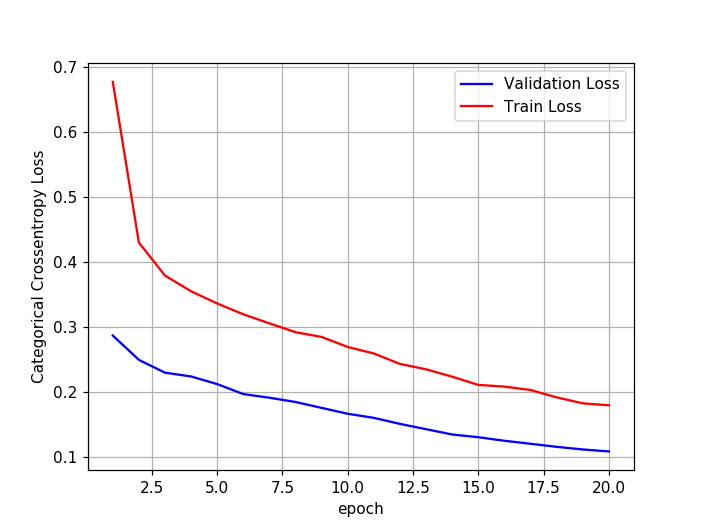

In [35]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
#print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Architecture 2 , (MLP + Dropout() + Adam)

In [36]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(130, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_14 (Batc (None, 128)               512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 130)               16770     
__________

In [37]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 40s 674us/step - loss: 1.2226 - acc: 0.6081 - val_loss: 0.3774 - val_acc: 0.8912
Epoch 2/20
60000/60000 [==============================] - 36s 596us/step - loss: 0.6611 - acc: 0.7902 - val_loss: 0.3246 - val_acc: 0.9068
Epoch 3/20
60000/60000 [==============================] - 36s 594us/step - loss: 0.5595 - acc: 0.8268 - val_loss: 0.3075 - val_acc: 0.9110
Epoch 4/20
60000/60000 [==============================] - 35s 583us/step - loss: 0.5116 - acc: 0.8439 - val_loss: 0.2921 - val_acc: 0.9170
Epoch 5/20
60000/60000 [==============================] - 34s 570us/step - loss: 0.4837 - acc: 0.8537 - val_loss: 0.2814 - val_acc: 0.9196
Epoch 6/20
60000/60000 [==============================] - 34s 565us/step - loss: 0.4590 - acc: 0.8620 - val_loss: 0.2682 - val_acc: 0.9231
Epoch 7/20
60000/60000 [==============================] - 36s 608us/step - loss: 0.4359 - acc: 0.8694 - val_loss: 0.

Test accuracy: 0.9562


<IPython.core.display.Javascript object>


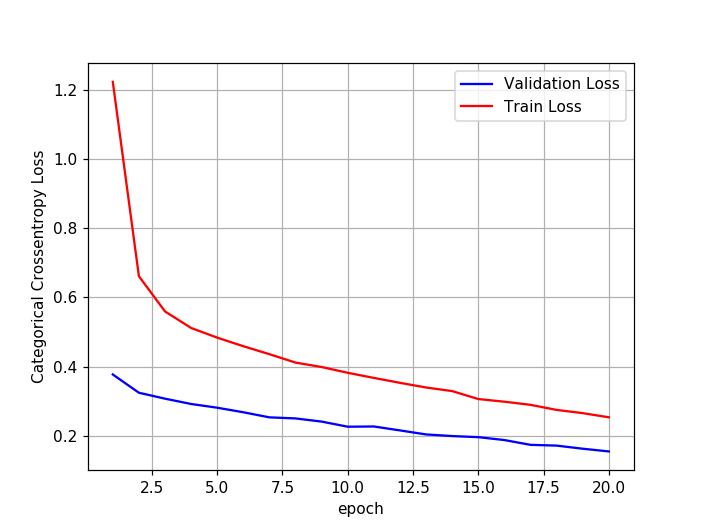

In [38]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
#print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Architecture 3 , (MLP + Dropout() + Adam)

In [39]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(130, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(140, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(111, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_17 (Batc (None, 128)               512       
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 130)               16770     
__________

In [40]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 53s 885us/step - loss: 2.3379 - acc: 0.2250 - val_loss: 1.0915 - val_acc: 0.6353
Epoch 2/20
60000/60000 [==============================] - 45s 745us/step - loss: 1.5540 - acc: 0.4308 - val_loss: 0.9034 - val_acc: 0.6928
Epoch 3/20
60000/60000 [==============================] - 45s 745us/step - loss: 1.2599 - acc: 0.5434 - val_loss: 0.7305 - val_acc: 0.7744
Epoch 4/20
60000/60000 [==============================] - 43s 716us/step - loss: 1.0971 - acc: 0.6173 - val_loss: 0.5888 - val_acc: 0.8169
Epoch 5/20
60000/60000 [==============================] - 41s 680us/step - loss: 0.9648 - acc: 0.6759 - val_loss: 0.5293 - val_acc: 0.8374
Epoch 6/20
60000/60000 [==============================] - 42s 695us/step - loss: 0.8562 - acc: 0.7165 - val_loss: 0.4888 - val_acc: 0.8470
Epoch 7/20
60000/60000 [==============================] - 40s 665us/step - loss: 0.7921 - acc: 0.7453 - val_loss: 0.

Test accuracy: 0.9313


<IPython.core.display.Javascript object>


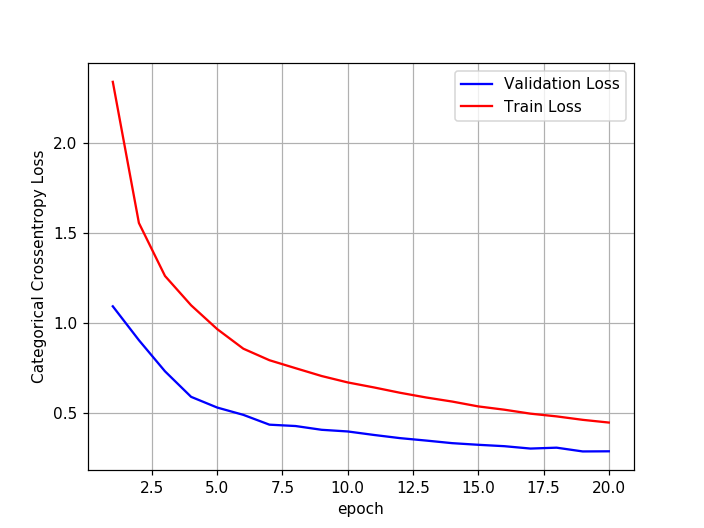

In [41]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
#print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)